# Tone Notebook

tbh this file will be cleaned up/deleted

Using answer by Gus B from: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
Kinda whack but whatever for now. Run the next cell only ONCE (cd..), it changes the working directory to the parent so we can import stuff from the tonami, utils, etc. folder. If you mess up, restart the Jupyter kernel. Run the (cd..) cell again every time you restart.

In [1]:
%cd ..

/app


In [2]:
import warnings
import math
import os
from itertools import zip_longest

import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
import pandas as pd

from tonami import pitch_process as pp
from dev import parse_data
from data_viz import viz

warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

## Pitch Analysis

In [3]:
# load pitch data from all speakers
pitch_data = pd.read_json('data/parsed/toneperfect_pitch.json')

In [11]:
# TODO: Move function to viz.py when happy with results

# https://stackoverflow.com/questions/27826666/plotting-1000-lines-with-ggplot2
def plot_raw_pitch(data, spkr:str, tone:int, folder='data/images/'):
    """Plot raw pitch contours for a single speaker and tone and save the
    resulting graph in folder.
    
    Args:
        data (pd.DataFrame): pitch information and metadata dataset
        spkr (str): speaker id
        tone (int): tone number 1-4
        folder (str): location to save graph
    """
    spkr_data = data.loc[(data['speaker'] == spkr) & (data['tone'] == tone), 'pitch_contour']
    padded = viz.pad_matrix(np.array(spkr_data))
    idx_names = [f'contour{i}' for i in range(padded.shape[0])]
    df = pd.DataFrame(padded, index=idx_names)
    df['contour'] = idx_names

    # sort of "unrolling" the matrix to plot as a line
    df_melt = pd.melt(df, id_vars='contour')

    pitch_plot = p9.ggplot(data=df_melt, mapping=p9.aes(x='variable', y='value', group='contour'))
    # TODO: plot mean
    plot_lines = pitch_plot + p9.theme_bw() + p9.geom_line(size=0.3, alpha=0.2) + p9.theme(figure_size=(14, 8))
    filename = os.path.join(folder, f'{spkr}_t{tone}.png')
    plot_lines.save(filename=filename)
    
    # show plot
    plot_lines.draw(show=True)



/opt/conda/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 14 x 8 in image.
/opt/conda/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: data/images/FV1_t1.png
/opt/conda/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 16 rows containing missing values.
/opt/conda/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 16 rows containing missing values.


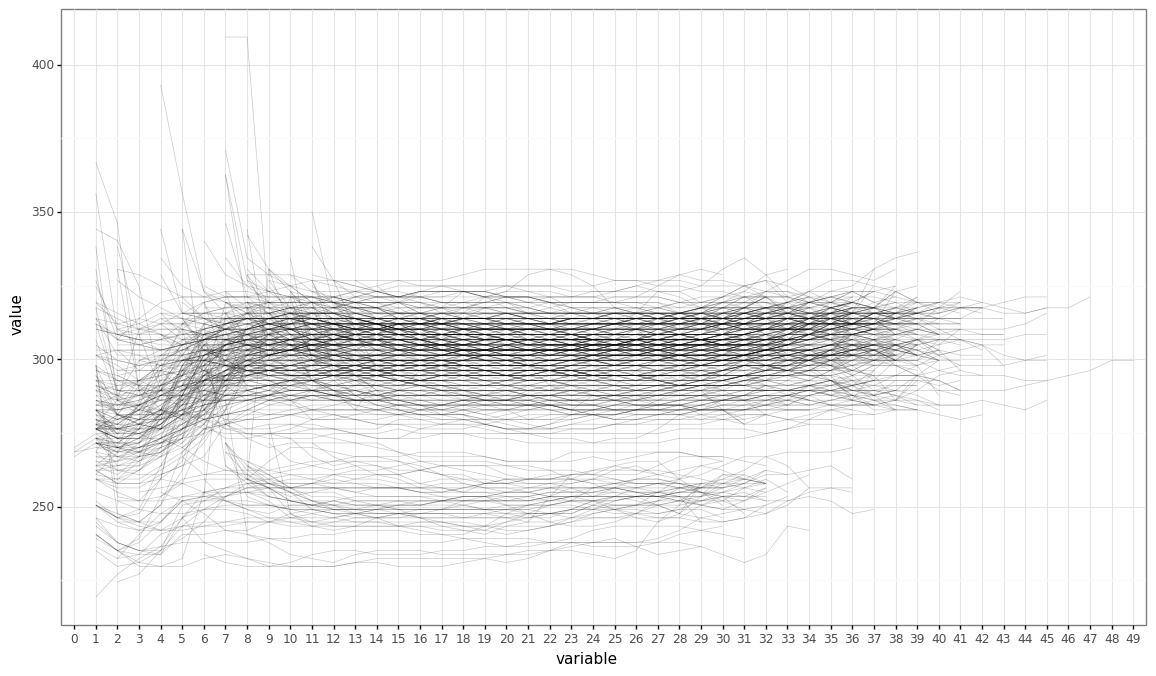

In [12]:
plot_raw_pitch(pitch_data, 'FV1', 1)